In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pl
from data_manager import DataManager as dm
import numpy as np
import math



# Data Collection and Project Initialization


In [32]:
train_values=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')
df_info = pd.read_csv('./data/data_info.csv')
df=pd.merge(train_values,train_labels, on='building_id')

# Data Exploration and Preprocessing

## Raw Data Analysis.
We set the scale of features by using the data `scale_type` array.  
Then, create an initial quality report for all raw data..

In [33]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data_report = dm.data_analyser(df, df_info['type'].to_list())
data_report['df']

,Cardinality (#),Scale,Miss (#),Miss (%),Domain,Stored_data_type
Feature,,,,,,
building_id,260601,id,0,0.0,"[802906, 28830, 94947, 590882, 201944, 333020,...",int64
geo_level_1_id,31,id,0,0.0,"[6, 8, 21, 22, 11, 9, 20, 0, 26, 17, 12, 18, 4...",int64
geo_level_2_id,1414,id,0,0.0,"[487, 900, 363, 418, 131, 558, 475, 323, 757, ...",int64
geo_level_3_id,11595,id,0,0.0,"[12198, 2812, 8973, 10694, 1488, 6089, 12066, ...",int64
count_floors_pre_eq,9,nominal,0,0.0,"[2, 3, 1, 4, 5, 6, 7, 8, 9]",int64
age,42,ratio,0,0.0,"[30, 10, 25, 0, 15, 20, 45, 55, 5, 40, 80, 60,...",int64
area_percentage,84,ratio,0,0.0,"[6, 8, 5, 9, 3, 13, 7, 4, 12, 16, 11, 27, 10, ...",int64
height_percentage,27,ratio,0,0.0,"[5, 7, 9, 4, 6, 3, 10, 8, 2, 32, 12, 11, 13, 1...",int64
land_surface_condition,3,nominal,0,0.0,"[t, o, n]",object


In [5]:
df_num = df.loc[:,df.dtypes!=np.object]
df_cat = df.loc[:,df.dtypes==np.object]

C:\Users\anant\AppData\Local\Temp/ipykernel_4652/713373089.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num = df.loc[:,df.dtypes!=np.object]
C:\Users\anant\AppData\Local\Temp/ipykernel_4652/713373089.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.loc[:,df.dtypes==np.object]


## Numerical Data Analysis

### Identifying Null values

#### As there are no null values no further processing is required

In [6]:
df_num.isnull().sum().sort_values(ascending=False)

building_id                               0
geo_level_1_id                            0
has_secondary_use_other                   0
has_secondary_use_use_police              0
has_secondary_use_gov_office              0
has_secondary_use_health_post             0
has_secondary_use_industry                0
has_secondary_use_school                  0
has_secondary_use_institution             0
has_secondary_use_rental                  0
has_secondary_use_hotel                   0
has_secondary_use_agriculture             0
has_secondary_use                         0
count_families                            0
has_superstructure_other                  0
has_superstructure_rc_engineered          0
has_superstructure_rc_non_engineered      0
has_superstructure_bamboo                 0
has_superstructure_timber                 0
has_superstructure_cement_mortar_brick    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_stone    0
has_superstructure_stone_flag   

### Identifying Outliers

C:\Users\anant\AppData\Local\Temp/ipykernel_4652/1521909292.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_for_hist.hist(bins=20, alpha=0.5, ax=ax)


array([[<AxesSubplot:title={'center':'building_id'}>,
        <AxesSubplot:title={'center':'geo_level_1_id'}>,
        <AxesSubplot:title={'center':'geo_level_2_id'}>,
        <AxesSubplot:title={'center':'geo_level_3_id'}>,
        <AxesSubplot:title={'center':'count_floors_pre_eq'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'area_percentage'}>,
        <AxesSubplot:title={'center':'height_percentage'}>,
        <AxesSubplot:title={'center':'has_superstructure_adobe_mud'}>,
        <AxesSubplot:title={'center':'has_superstructure_mud_mortar_stone'}>,
        <AxesSubplot:title={'center':'has_superstructure_stone_flag'}>,
        <AxesSubplot:title={'center':'has_superstructure_cement_mortar_stone'}>],
       [<AxesSubplot:title={'center':'has_superstructure_mud_mortar_brick'}>,
        <AxesSubplot:title={'center':'has_superstructure_cement_mortar_brick'}>,
        <AxesSubplot:title={'center':'has_superstructure_timber'}>,
        <AxesSubpl

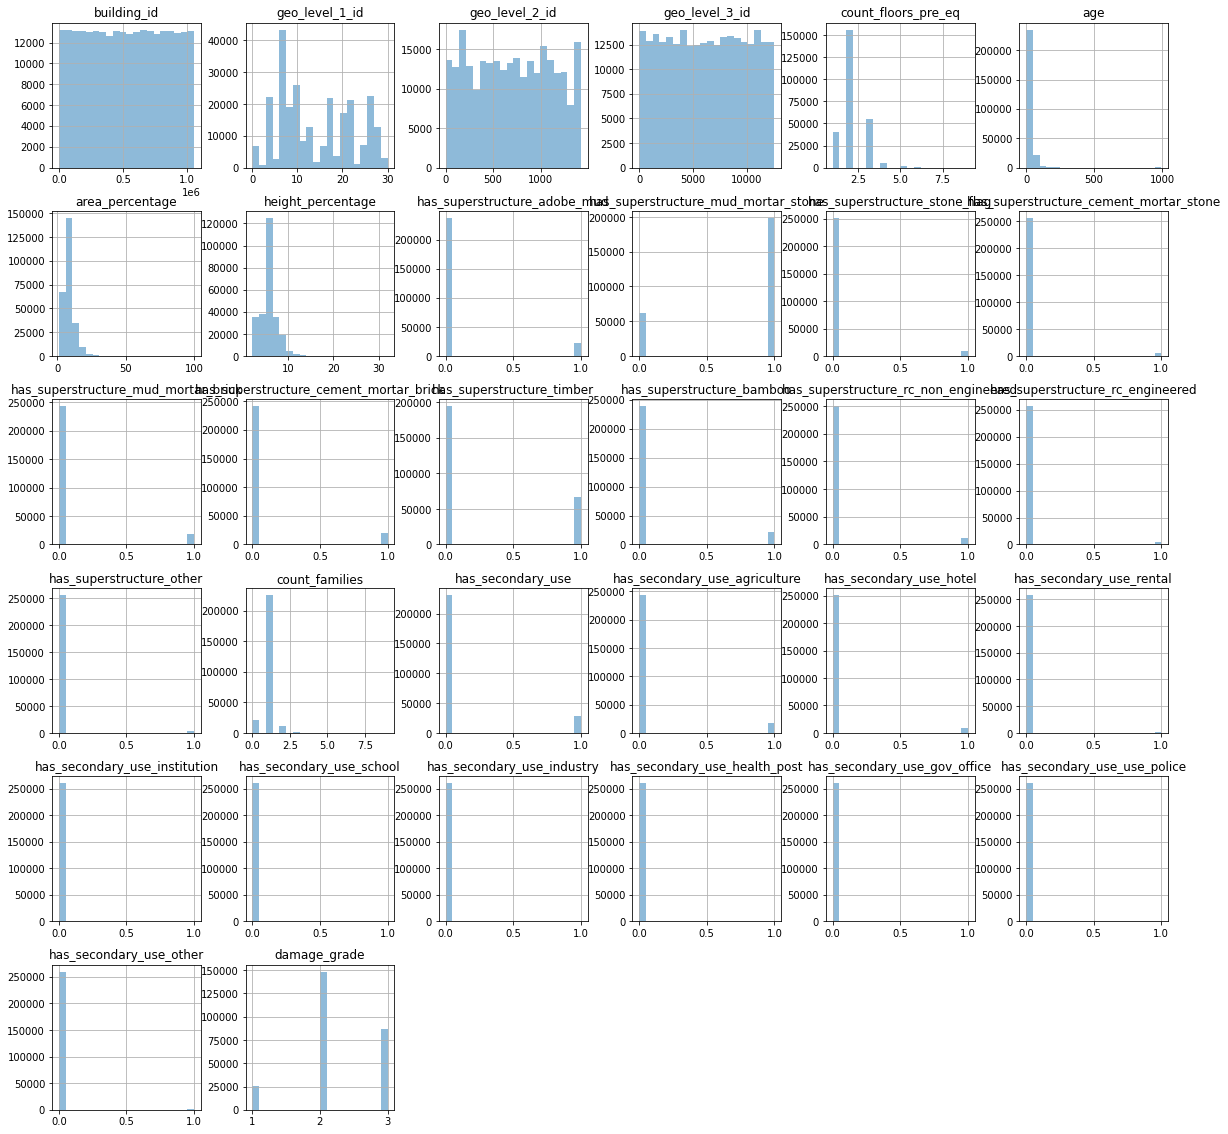

In [7]:
#OUTLIER_MAX_DIST = 1.5
df1=df_num
col_list=[]
for (name, series) in df1.iteritems():
    if series.dtype != 'object':
        col_list.append(name)

fig, ax = pl.subplots(figsize=(20,20)) # get a bigger figure
df_for_hist = df[col_list]

df_for_hist.hist(bins=20, alpha=0.5, ax=ax)

<AxesSubplot:xlabel='age'>

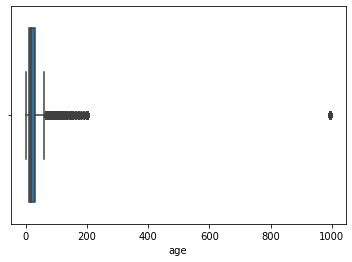

In [8]:
#boxplotting interval scale data before removing outliers
sns.boxplot(x=df_num['age'])

<AxesSubplot:xlabel='area_percentage'>

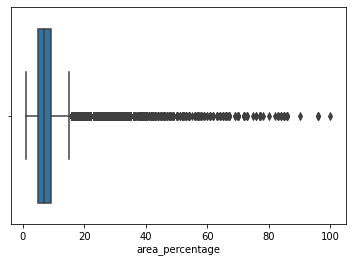

In [9]:
sns.boxplot(x=df_num['area_percentage'])

<AxesSubplot:xlabel='height_percentage'>

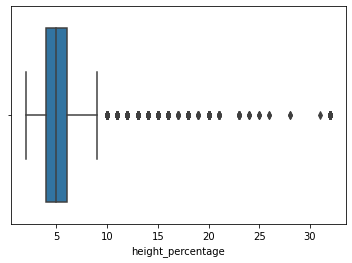

In [10]:
sns.boxplot(x=df_num['height_percentage'])

<AxesSubplot:xlabel='geo_level_1_id'>

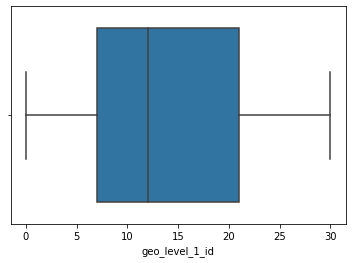

In [11]:
sns.boxplot(x=df_num['geo_level_1_id'])

<AxesSubplot:xlabel='geo_level_2_id'>

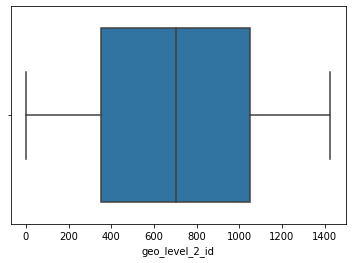

In [12]:
sns.boxplot(x=df_num['geo_level_2_id'])

<AxesSubplot:xlabel='geo_level_3_id'>

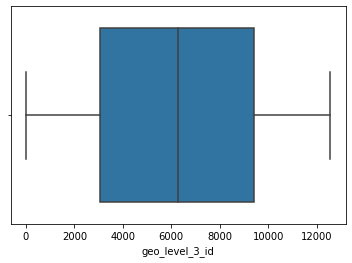

In [13]:
sns.boxplot(x=df_num['geo_level_3_id'])

sns.boxplot(x=df_num['count_floors_pre_eq'])

sns.boxplot(x=df_num['has_superstructure_adobe_mud'])

sns.boxplot(x=df_num['has_superstructure_mud_mortar_stone'])

sns.boxplot(x=df_num['has_superstructure_stone_flag'])

### Custom function to clear outliers

In [14]:
def cap_data(d):
    for col in d.columns:
        print("capping the ",col)
        if (((d[col].dtype)=='float64') | ((d[col].dtype)=='int64')):
            percentiles = d[col].quantile([0.1,0.9]).values
            d[col][df[col] <= percentiles[0]] = percentiles[0]
            d[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            d[col]=d[col]
    return d

##### removing Outliers

In [15]:
df_num_cleaned=cap_data(df_num.drop(['damage_grade',"building_id"],axis=1))

capping the  geo_level_1_id
capping the  geo_level_2_id
capping the  geo_level_3_id
capping the  count_floors_pre_eq
capping the  age
capping the  area_percentage
capping the  height_percentage
capping the  has_superstructure_adobe_mud
capping the  has_superstructure_mud_mortar_stone
capping the  has_superstructure_stone_flag
capping the  has_superstructure_cement_mortar_stone
capping the  has_superstructure_mud_mortar_brick
capping the  has_superstructure_cement_mortar_brick
capping the  has_superstructure_timber
capping the  has_superstructure_bamboo
capping the  has_superstructure_rc_non_engineered
capping the  has_superstructure_rc_engineered
capping the  has_superstructure_other
capping the  count_families
capping the  has_secondary_use
capping the  has_secondary_use_agriculture
capping the  has_secondary_use_hotel
capping the  has_secondary_use_rental
capping the  has_secondary_use_institution
capping the  has_secondary_use_school
capping the  has_secondary_use_industry
capping t

### Numerical Data Quality Report

In [16]:
dm.numerical_report(df_num_cleaned, 1.5, out_method='qrt')

,Count,Missing (%),Cardinality (#),Min,Q1,Median,Q3,Max,Mean,Std.Dev,Outlier_lower,Outlier_upper,Number of outliers,Outliers (%),Note
Feature,,,,,,,,,,,,,,,
geo_level_1_id,260601,0.0,23,4,7.0,12.0,21.0,26,13.93,7.68,-14.0,42.0,0,0.00,
geo_level_2_id,260601,0.0,1121,142,350.0,702.0,1050.0,1273,699.53,388.14,-700.0,2100.0,0,0.00,
geo_level_3_id,260601,0.0,9283,1219,3073.0,6270.0,9412.0,11286,6256.48,3452.38,-6435.5,18920.5,0,0.00,
count_floors_pre_eq,260601,0.0,3,1,2.0,2.0,2.0,3,2.09,0.63,2.0,2.0,103978,39.90,"outlier_h, outlier_l,"
age,260601,0.0,9,5,10.0,15.0,30.0,45,19.85,13.30,-20.0,60.0,0,0.00,
area_percentage,260601,0.0,10,4,5.0,7.0,9.0,13,7.63,2.78,-1.0,15.0,0,0.00,
height_percentage,260601,0.0,6,3,4.0,5.0,6.0,8,5.35,1.49,1.0,9.0,0,0.00,
has_superstructure_adobe_mud,260601,0.0,1,0,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0,0,0.00,
has_superstructure_mud_mortar_stone,260601,0.0,2,0,1.0,1.0,1.0,1,0.76,0.43,1.0,1.0,62040,23.81,"outlier_l,"


In [17]:
corr_matrix = df.corr()
l=(corr_matrix["damage_grade"]).sort_values(ascending=False)

### Identifying coorelation between features using Heatmap

<AxesSubplot:>

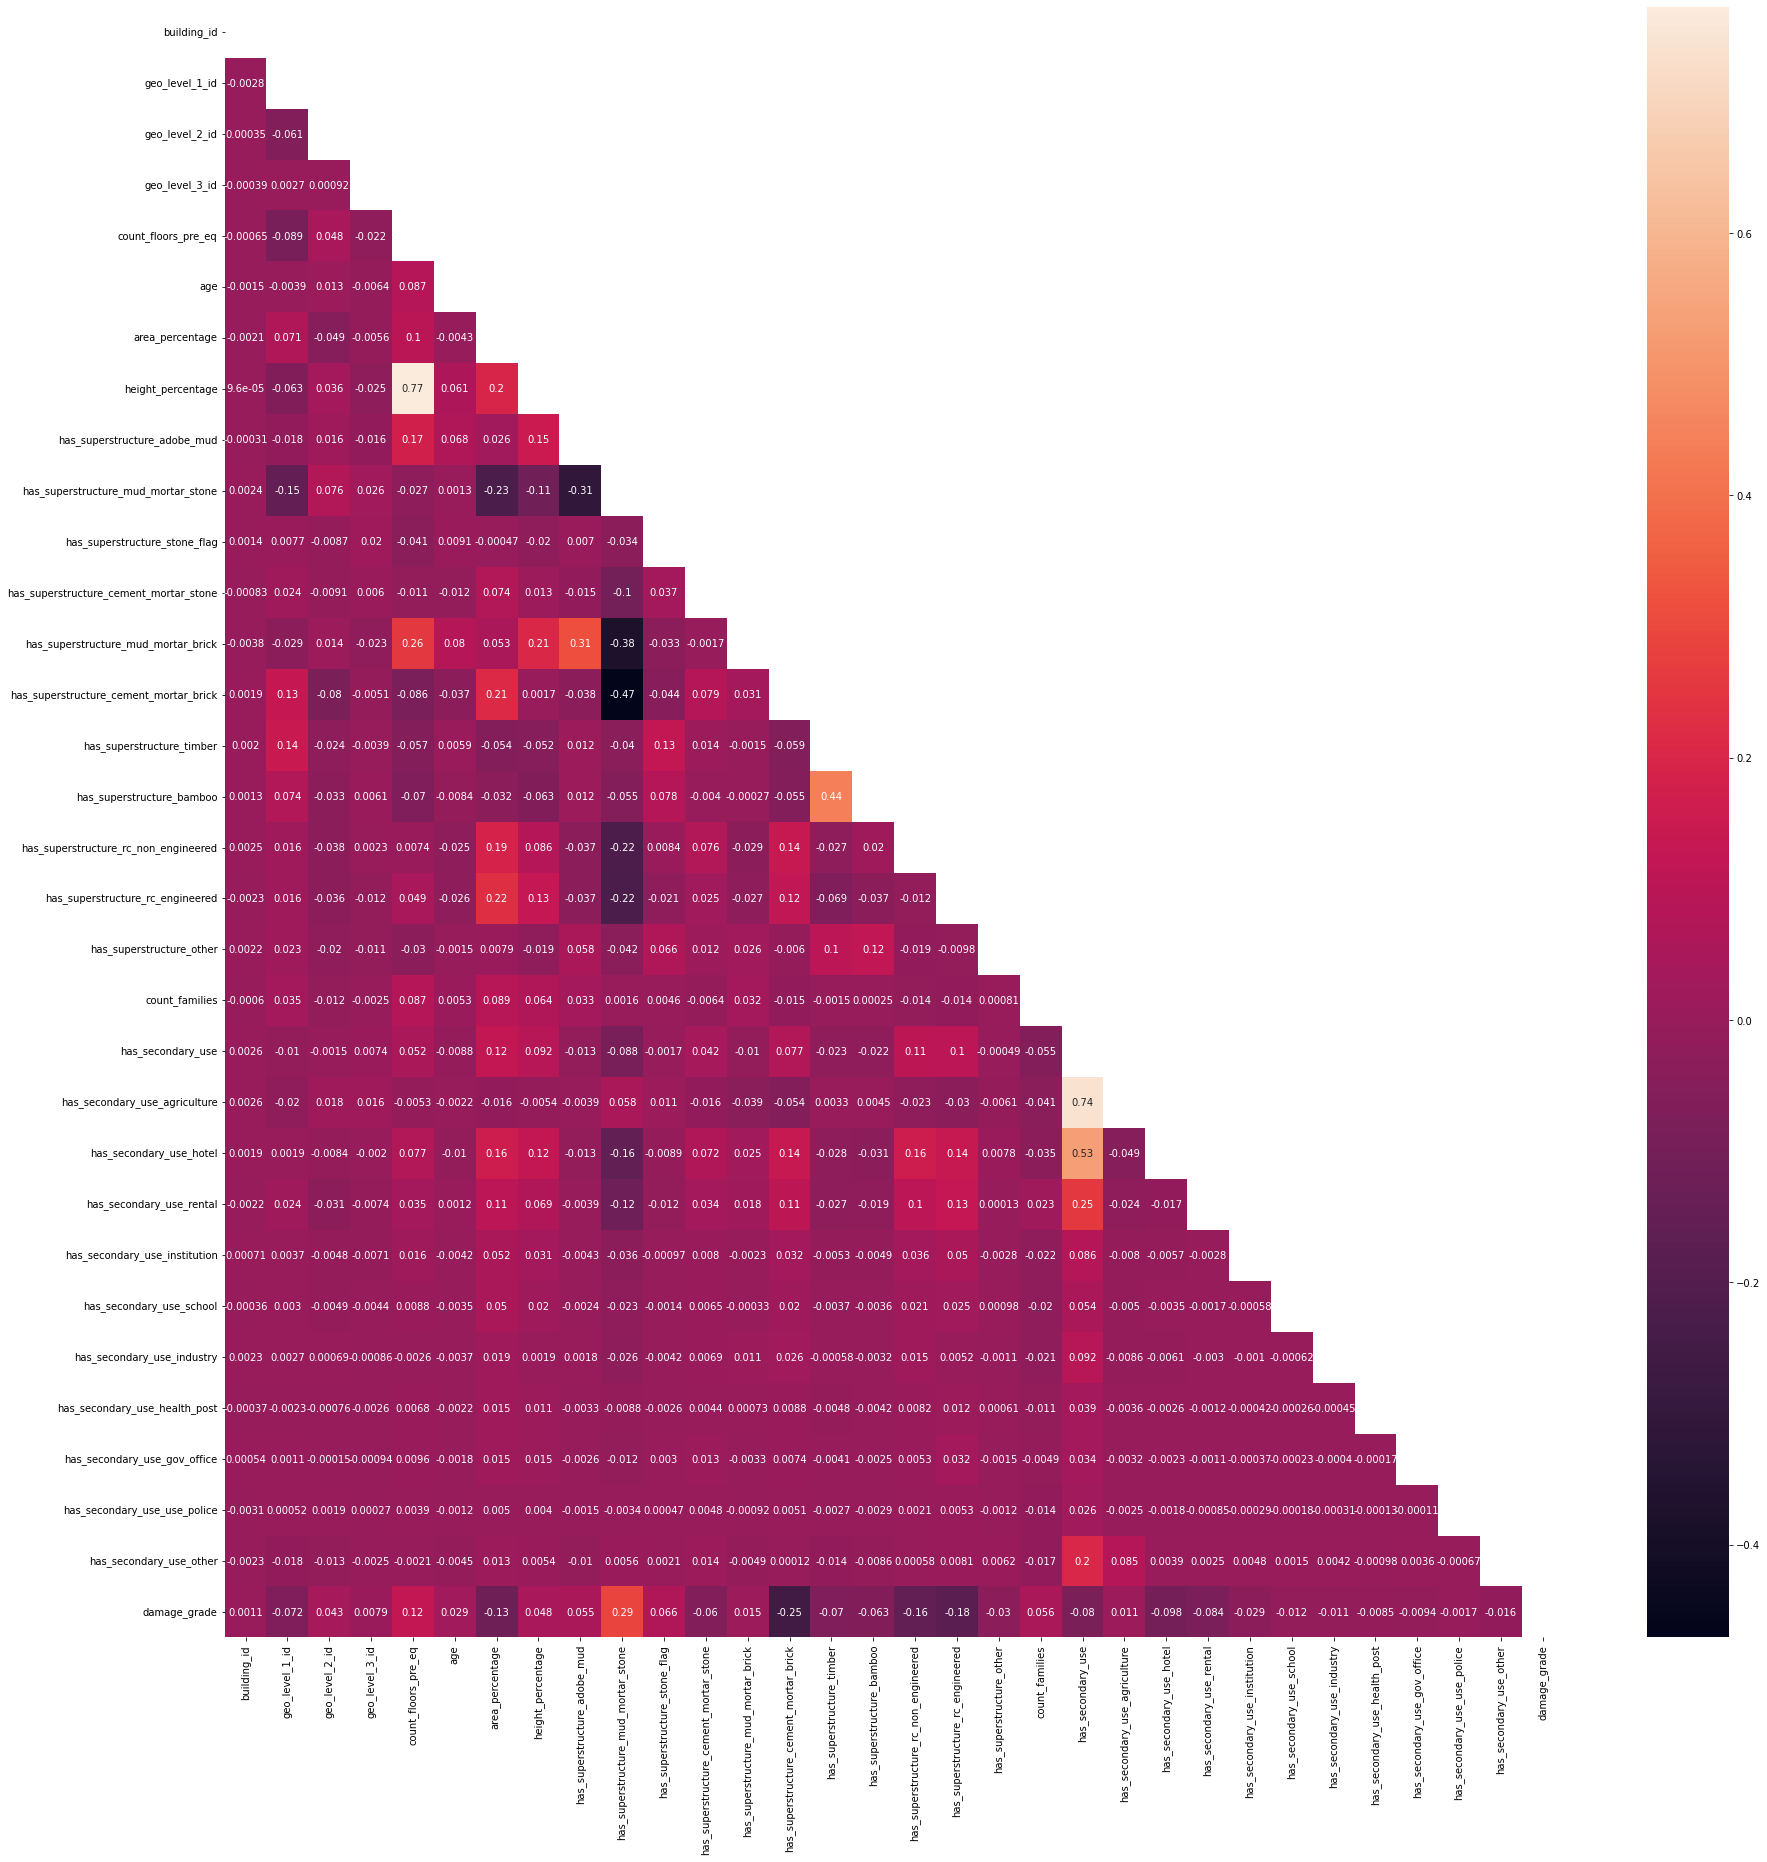

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
mask=np.triu(corr_matrix)
sns.heatmap(corr_matrix,annot=True,ax=ax,mask=mask)

## Categorical Data Analysis

### Distribution

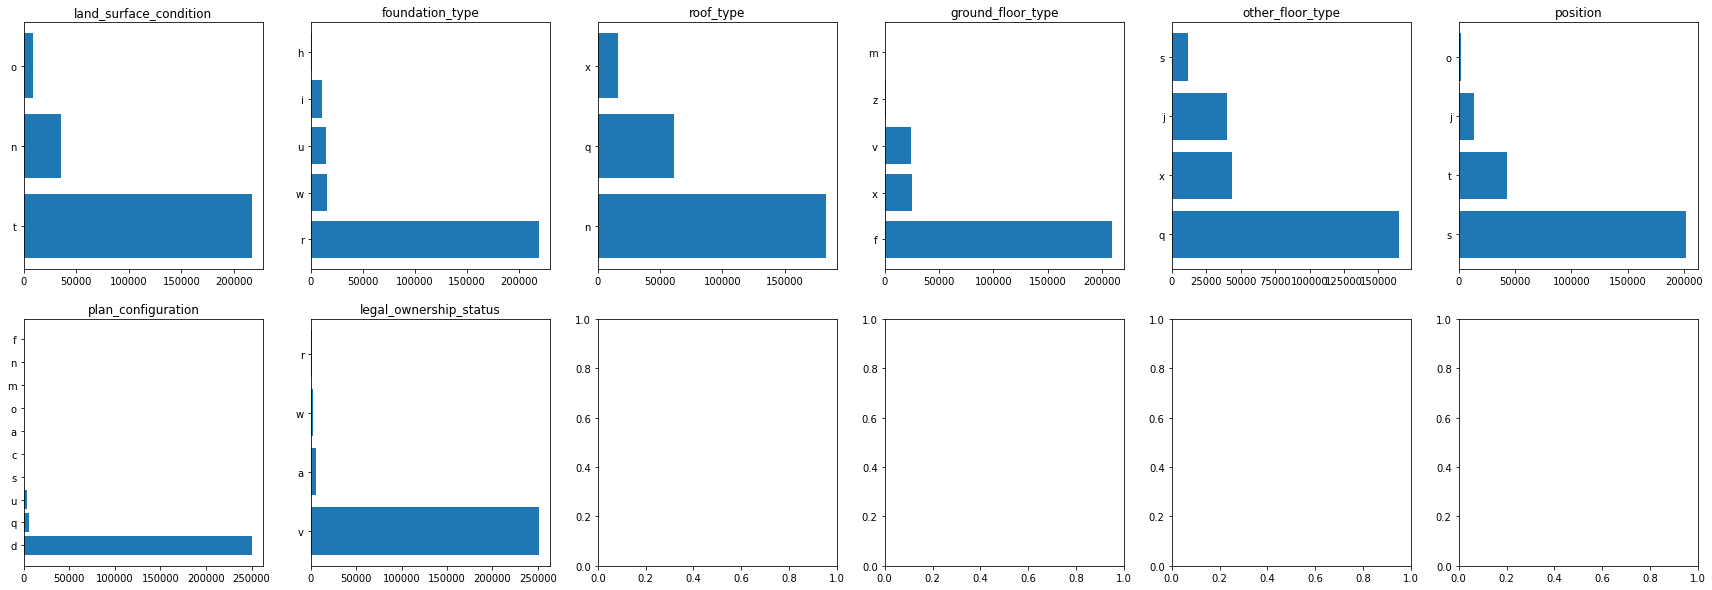

In [19]:
COL_NUMBER = 6
row_number = math.ceil(df_cat.columns.size/COL_NUMBER)
fig2, axs = pl.subplots(row_number,COL_NUMBER,figsize=(5*COL_NUMBER,5*row_number))
i = 0
for attr in df_cat.items():
    name = attr[0]
    domain = [str(key) for key in attr[1].value_counts().keys().to_list()]
    counts = attr[1].value_counts().values
    col = i%COL_NUMBER
    row = math.floor(i/COL_NUMBER)
    axs[row,col].barh(domain, counts)
    axs[row,col].set_title(name)
    i+=1

### Quality Report

In [20]:
dm.categorical_report(df_cat)

,Count,Missing (%),Cardinality (#),Mode,Mode Freq,Mode (%),2nd Mode,2nd Mode Freq,2nd Mode (%),Note
Feature,,,,,,,,,,
land_surface_condition,260601,0.0,3,t,216757,83.18,n,35528,13.63,
foundation_type,260601,0.0,5,r,219196,84.11,w,15118,5.80,
roof_type,260601,0.0,3,n,182842,70.16,q,61576,23.63,
ground_floor_type,260601,0.0,5,f,209619,80.44,x,24877,9.55,
other_floor_type,260601,0.0,4,q,165282,63.42,x,43448,16.67,
position,260601,0.0,4,s,202090,77.55,t,42896,16.46,
plan_configuration,260601,0.0,10,d,250072,95.96,q,5692,2.18,
legal_ownership_status,260601,0.0,4,v,250939,96.29,a,5512,2.12,


## Normalization and Transformation

In [21]:
df_full= pd.concat([df_num_cleaned,df_cat], axis=1)

In [22]:
df_full.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.0,260601.000000,260601.0,...,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0
mean,13.933181,699.533958,6256.482066,2.088626,19.852879,7.632615,5.347209,0.0,0.761935,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.684684,388.143621,3452.382307,0.625412,13.298994,2.784354,1.491625,0.0,0.425900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.000000,142.000000,1219.000000,1.000000,5.000000,4.000000,3.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,26.000000,1273.000000,11286.000000,3.000000,45.000000,13.000000,8.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Transforming the categorical Variables using ordinal encoder

In [23]:
o=OrdinalEncoder()
for i in df_full.columns:
    if df_full[i].dtype=="object" :
        df_full[i]=o.fit_transform(df_full[[i]])

#### Before using Standar Scalar

C:\Users\anant\AppData\Local\Temp/ipykernel_4652/4106283730.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


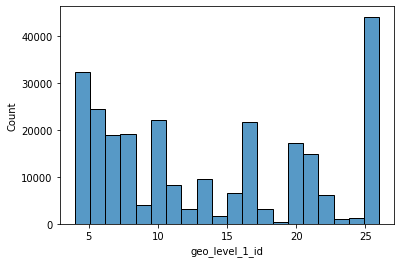

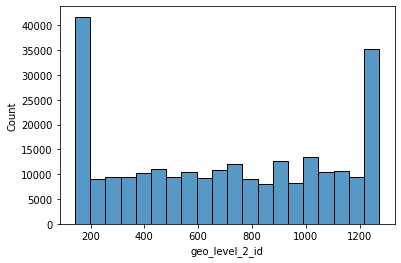

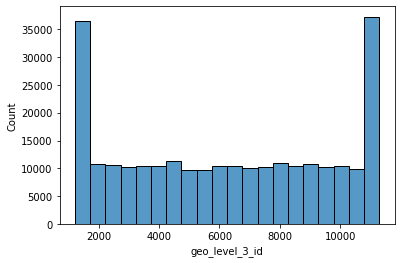

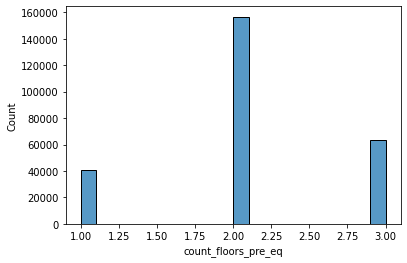

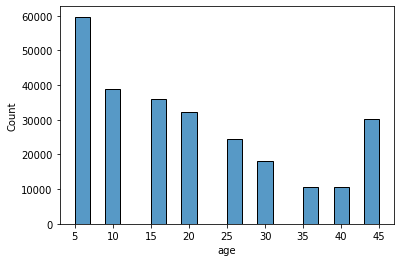

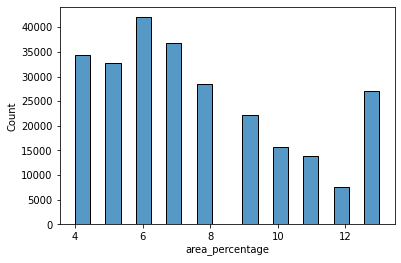

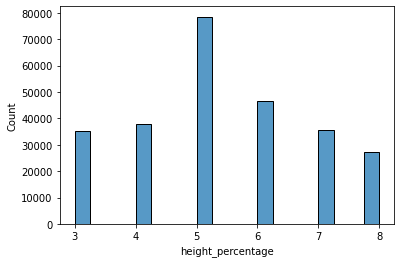

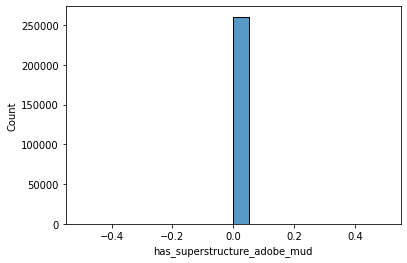

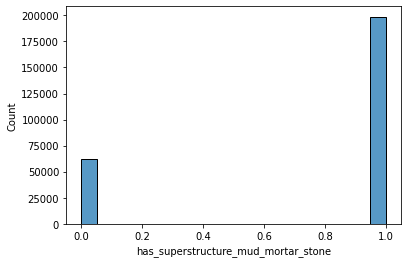

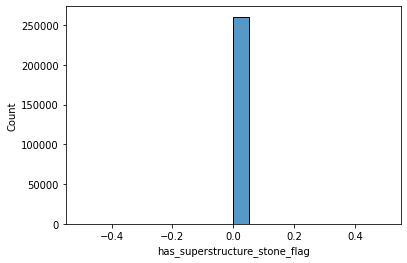

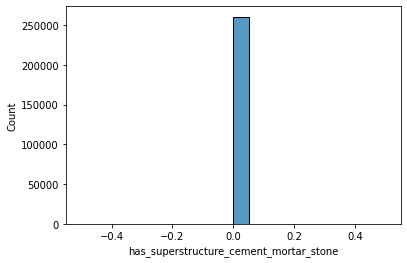

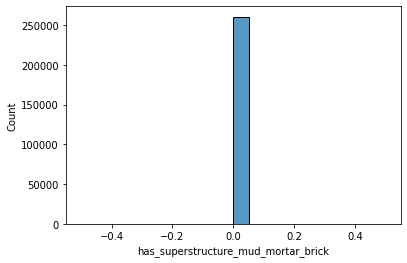

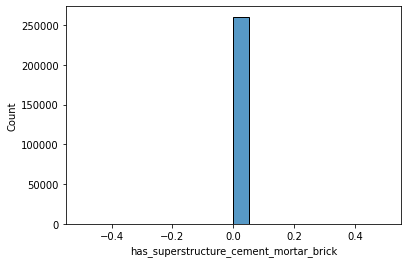

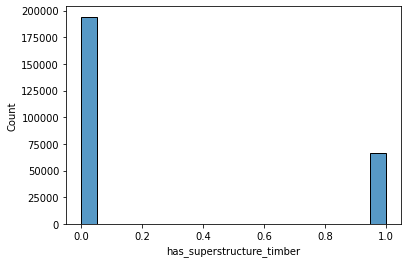

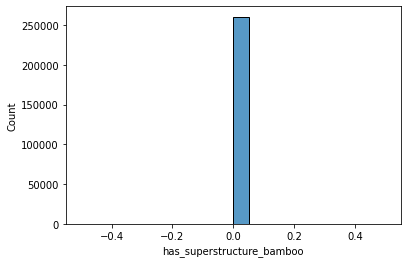

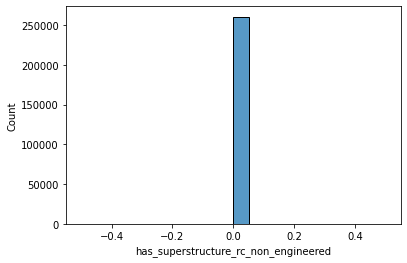

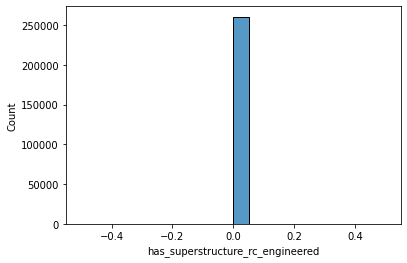

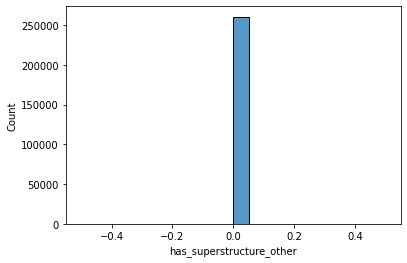

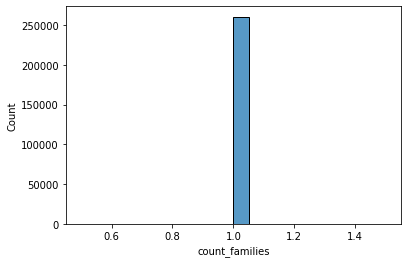

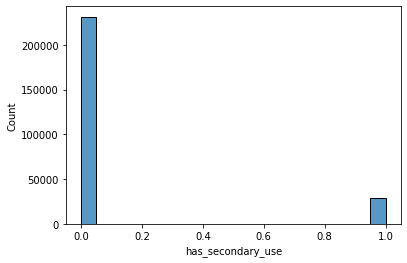

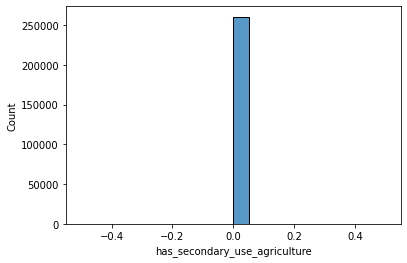

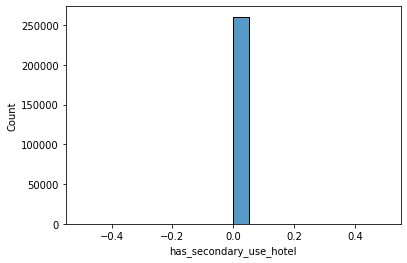

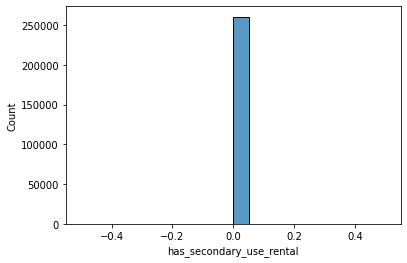

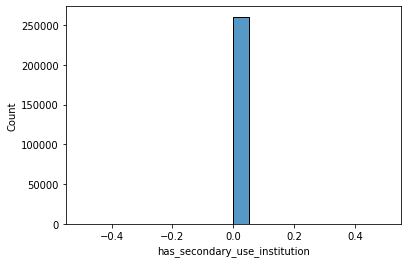

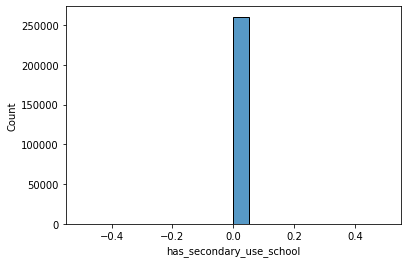

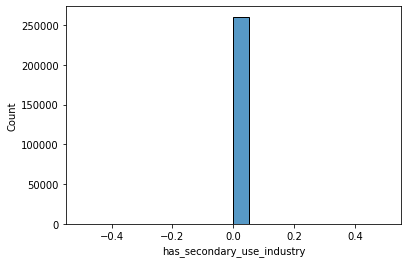

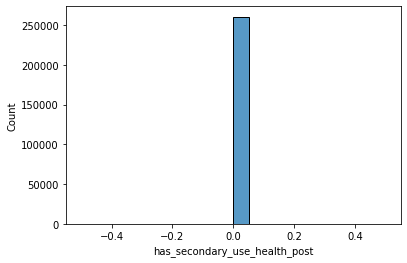

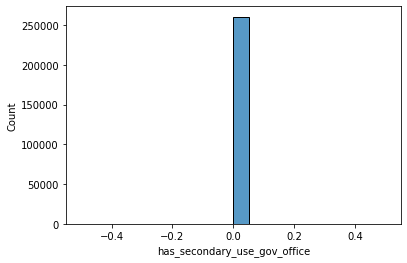

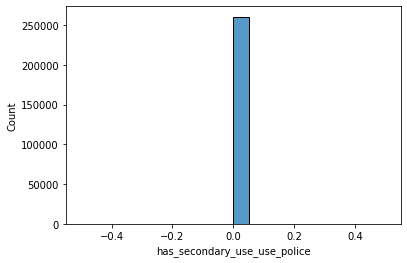

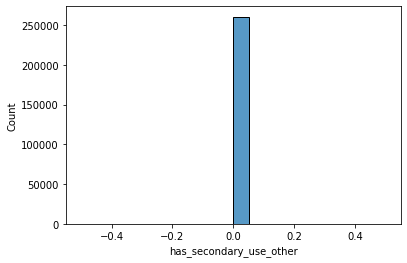

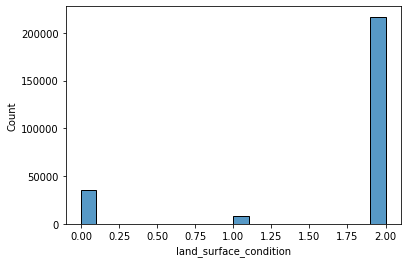

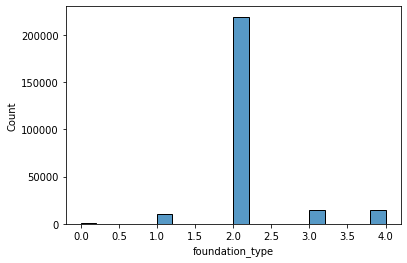

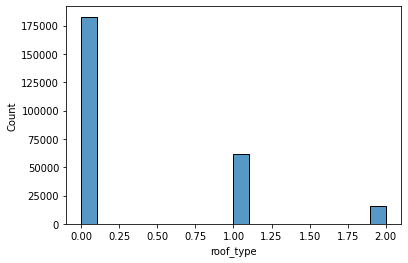

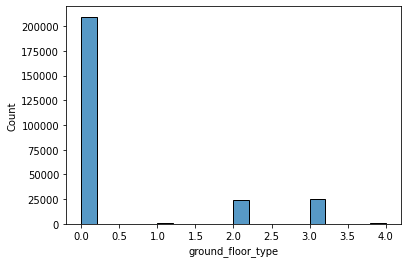

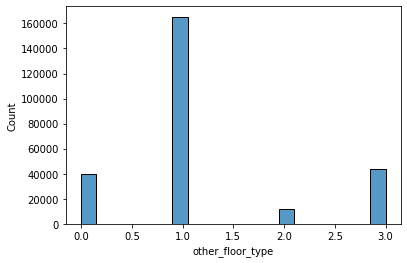

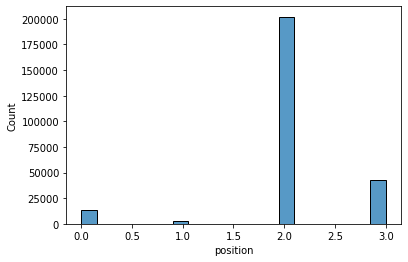

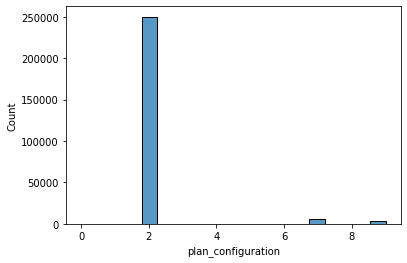

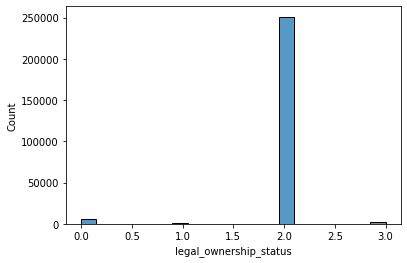

In [24]:
for column in df_full.columns:
    plt.figure()           
    sns.histplot(df_full[column],bins=20)

##### We are not using normalization for feature variable because there are only 3 unique values


In [25]:
scaler = StandardScaler()
df_full = pd.DataFrame(scaler.fit_transform(df_full),columns = df_full.columns)

#### data after using standard scalar also the data is not continuos, so instead of normalizing it, we are scaling it's range down.

C:\Users\anant\AppData\Local\Temp/ipykernel_4652/2745713435.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


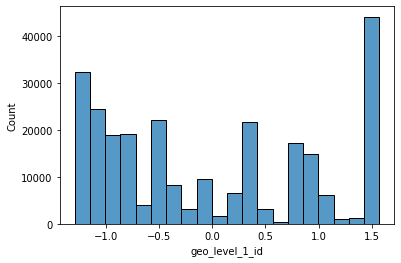

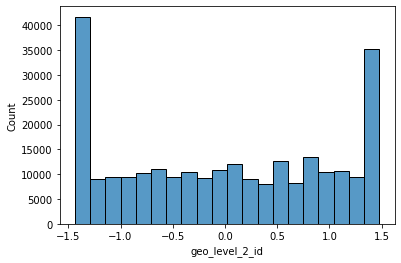

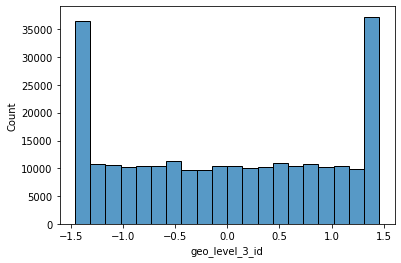

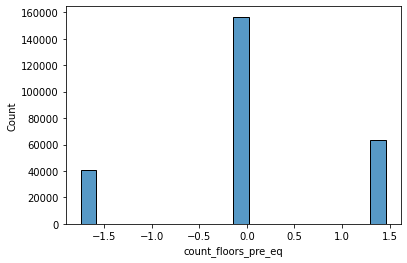

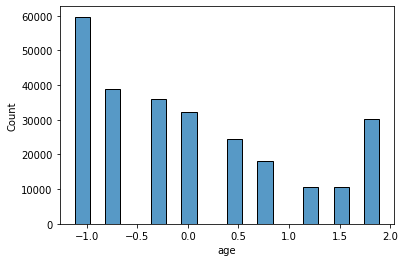

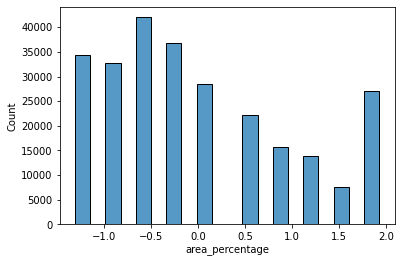

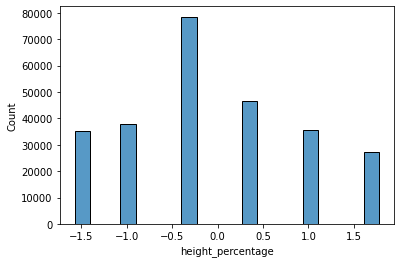

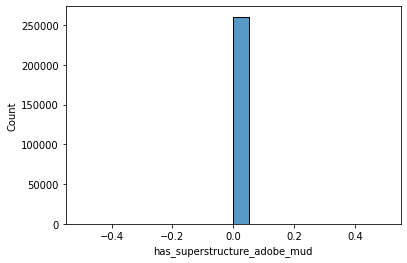

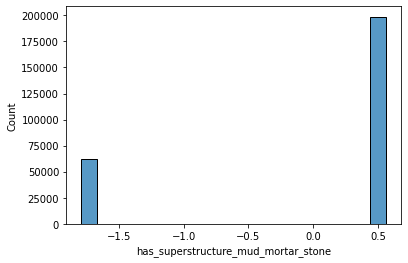

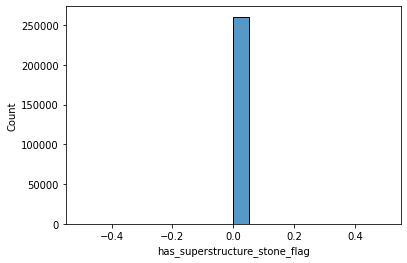

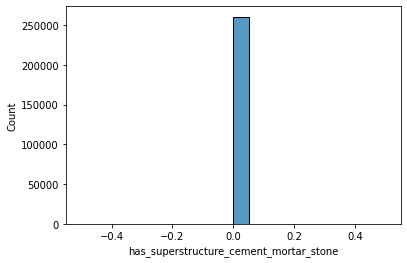

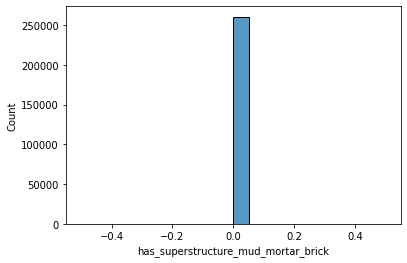

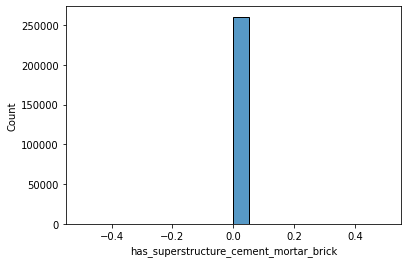

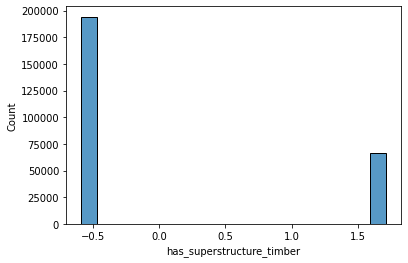

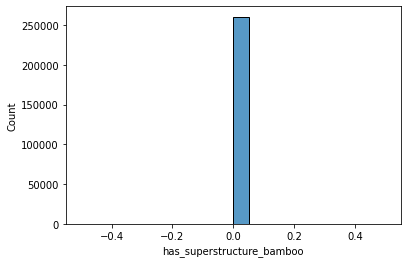

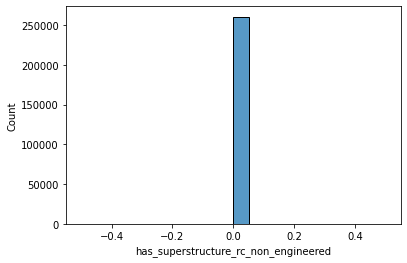

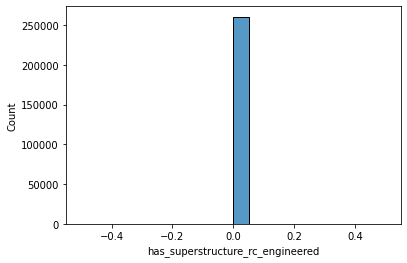

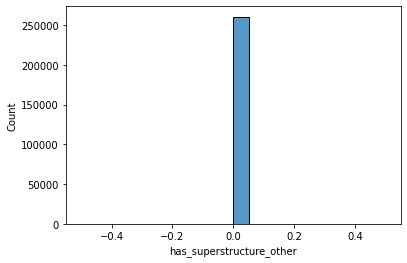

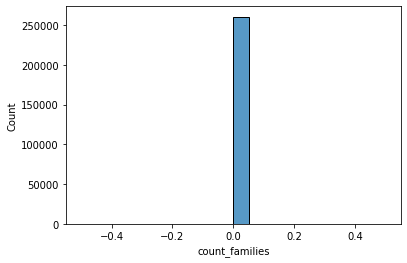

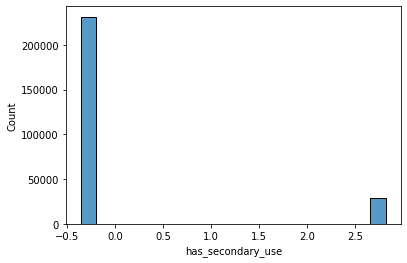

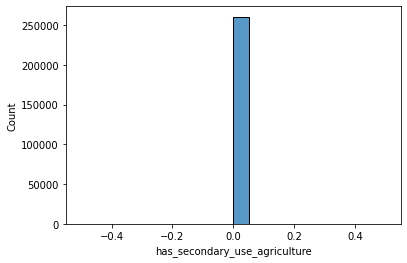

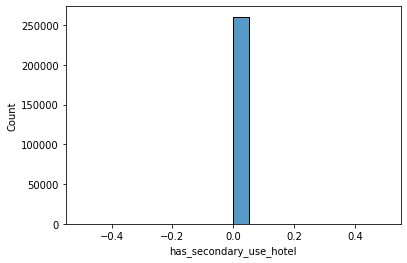

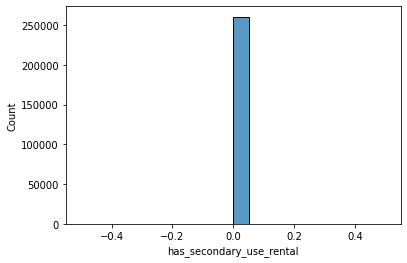

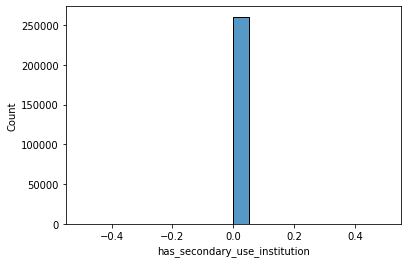

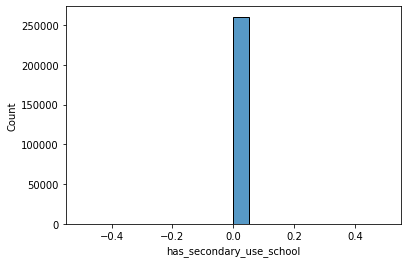

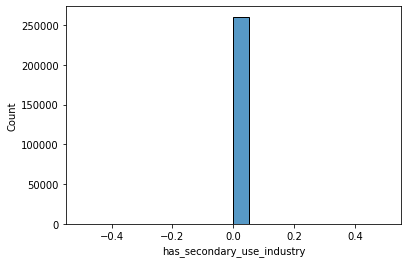

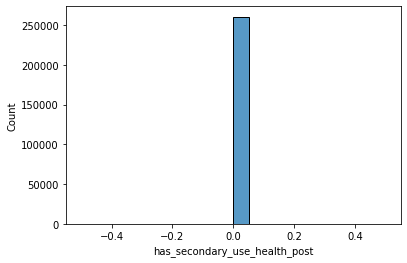

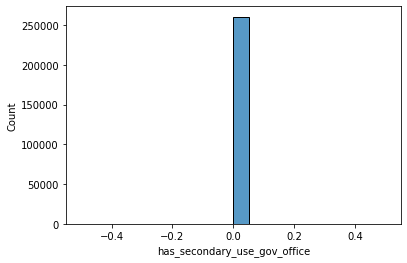

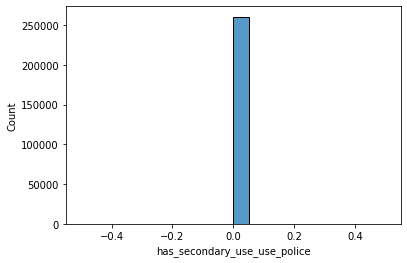

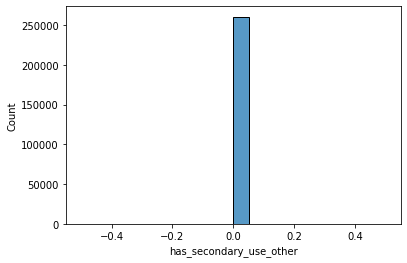

In [26]:
for column in df_num.columns[1:-1]:
    plt.figure()     
    sns.histplot(df_full[column],bins=20)

#### Saving the cleaned DataSet


In [27]:
df_full.to_csv("Cleaned_data.csv",index=False)

In [31]:
data_report = dm.data_analyser(df_full, df_info['type'].to_list()[1:-1])
data_report['df']

,Cardinality (#),Scale,Miss (#),Miss (%),Domain,Stored_data_type
Feature,,,,,,
geo_level_1_id,23,id,0,0.0,"[-1.0323386497263025, -0.7720802235839116, 0.9...",float64
geo_level_2_id,1121,id,0,0.0,"[-0.5475662980011381, 0.5164748705568228, -0.8...",float64
geo_level_3_id,9283,id,0,0.0,"[1.4568281078122753, -0.9977135696835667, 0.78...",float64
count_floors_pre_eq,3,nominal,0,0.0,"[-0.14170833158214277, 1.4572409634749188, -1....",float64
age,9,ratio,0,0.0,"[0.763000650934058, -0.7408754065777422, 0.387...",float64
area_percentage,10,ratio,0,0.0,"[-0.5863541551565078, 0.13194660184797027, -0....",float64
height_percentage,6,ratio,0,0.0,"[-0.23277276864337793, 1.1080496240985267, 1.7...",float64
has_superstructure_adobe_mud,1,nominal,0,0.0,[0.0],float64
has_superstructure_mud_mortar_stone,2,nominal,0,0.0,"[0.5589705393123854, -1.7890030505545869]",float64
